# Initial Imports

In [185]:
import Bio
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import pandas as pd
import seaborn as sns

## #1 ##

In [201]:
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.


##Description: this function opens a fasta file and reads in the necessary data
##Parameters: fasta_fn or the file which you wish to analyze
##Return: returns all of the information from the fasta file in a dictionary
##containing all of the sequence data information.

def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
#print(sequence_data_dict)


## #2 ##

In [139]:
##Description: translates a string of nucleotides into the respective 
##Amino acid sequence
##Parameters: string_nucleotides or the string of DNA to be analysed
##Return: the translated amino acid sequence

def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aminoReturn = ""
    nuc_string = str(string_nucleotides)
    stop_codons = ["TAA", "TAG", "AGA", "AGG"]
    #print(nuc_string)
    
    for seq in range(0, len(nuc_string))[::3]:
        codon = nuc_string[seq:seq+3]
        if codon in stop_codons:
            break
            
        aminoacid = mito_table.forward_table[codon]
        aminoReturn = aminoReturn + aminoacid
    aa_seq = Seq(aminoReturn)
    aa_seq.alphabet=IUPAC.protein
    return(aa_seq)

In [99]:
print(mito_table)
##Printing the mito_table object returns a codon table with respective 
##amino acids given the three amino acid sequence for 
##vertebreate Mitochondrial DNA.


Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [66]:
mito_table.forward_table["AAA"]
##Calling this function on the mito_table object determines the respective
##amino acid, in this case "AAA" results in Lysine (K) 

'K'

In [202]:
test = Seq('TGACTCAAACAAAATACATTTTGCCCGCGTTACATATGAATCAAGTTGGAAGTTATGGAG')
translate_function(test)

Seq('WLKQNTFCPRYMWIKLEVME', IUPACProtein())

---------------------------------
## #3 ##
# Alternate Function

In [198]:
##Description: translates a string of DNA nucleotides into the respective
##protein sequence
##Parameters: string_nucleotides or the nucleotide sequence used for analysis
##Return: translated protein sequence from the nucleotide sequence

def translate_two(string_nucleotides):
    nuc_string = Seq(str(string_nucleotides), IUPAC.unambiguous_dna)
    prot_string = nuc_string.translate(to_stop = True, table="Vertebrate Mitochondrial")
    return(prot_string)


In [204]:
translate_two(test)
##As before, this results in the same protein sequence as the original
##translate function.

Seq('WLKQNTFCPRYMWIKLEVME', IUPACProtein())

---------------------------------
## #4 ##
# Count AA Analysis Function

In [75]:
##Function that calculates the molecular weight 
##of each amino acid sequence

In [74]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [136]:
##Description: Computes molecular weight
##Parameters: aa_seq or the string of Amino acids to use
##Return: the computed molecular weight of the Amino acid string sequence

def compute_molecular_weight(aa_seq):
    string = str(aa_seq)
    protSeq = ProteinAnalysis(string)
    return(protSeq.molecular_weight())

In [160]:
##Using the the Biopython reference, 

my_seq = "MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV"
compute_molecular_weight(my_seq)

17103.1617

---------------------------------
## #5 ##
# GC Content Analysis Function

In [162]:
##Description: Computes the GC content of a string of nucleotides
##Parameters: string_nucleotides or the string of DNA to be analysed
##Return: the GC content of the string of nucleotides

def compute_gc_content(string_nucleotides):
    gcContent = 100*(string_nucleotides.count("G") + string_nucleotides.count("C"))/len(string_nucleotides)
    return(gcContent)

In [153]:
compute_gc_content("ACGTACGTACGTACGTACGTACGTACGTG")
compute_gc_content("ATCGAGTGAGCGTGTGACGCGAAGCGTGCGC")
##Function appears to be working correctly.

64.51612903225806

------------------------
## Main

In [81]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

In [82]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body data
species_list = list(penguins_df.species)

---------------------------------
## #6 ##

In [125]:
## Printing the key in the data frame to see what they are 

for key in penguins_df:
    print(key)
    
##Printing the value, which corresponds to the nucleotide sequence    
print(value)

species
mass
Molecular Weight
GC Content (%)
ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCCCTAATCGACCTGCCCACCCCATCAAACATTTCCGCCTGATGAAACTTTGGATCTCTCCTAGGCATCTGCTTAGCCACACAAATCCTAACTGGCCTCCTACTAGCTGCCCACTATACTGCAGACACAACCCTAGCCTTCTCATCCGTCGCCCACATATGCCGAAACGTACAATACGGCTGACTAATCCGCAACTTACATGCAAACGGAGCCTCATTCTTCTTTATCTGTATCTACCTGCATATCGGCCGCGGACTCTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACAGGCATCATCCTCCTACTTACCCTCATAGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGCCAGATATCCTTTTGAGGAGCCACAGTCATTACTAACCTATTCTCAGCTATCCCTTACATTGGCCAAACTCTCGTAGAATGAGCTTGAGGCGGCTTCTCAGTAGACAACCCCACTCTAACTCGATTCTTCGCACTACACTTCCTTCTCCCCTTCATAATCACAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAACAATCCACTAGGTATCGTAGCCAACTCCGACAAAATCCCATTCCACCCCTACTACTCCACAAAAGATATTCTAGGATTTATACTCCTACTCCTTCCACTAACAACCTTAGCCCTATTCTCACCCAACCTATTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCCCTAGTCACACCCCCACACATTAAACCAGAATGATACTTCCTATTTGCCTACGCCATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTAGCCCTAGCAGCATCCGTACTAATCCTATTCCTAATACCCCTCCTCCACAAATCTAAACAGCGCACAATAGCCTTCC

In [199]:
##Adding columns initially with 'NaN' values to the penguins_df data frame
penguins_df["Molecular Weight"] = 'NaN'
penguins_df["GC Content (%)"] = 'NaN'
penguins_df
##Columns have been successfully added

,species,mass,Molecular Weight,GC Content (%)
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


---------------------------------
## #7 ##

In [222]:
##Translation of each sequence while calculating the molecular weight and
##gc content and adding those values to their respective empty columns.

for key, value in cytb_seqs.items():
    #print(value)
    aa_seq = translate_function(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc_cont = compute_gc_content(value)
    #print(gc_cont)
    #print(mol_weight)
    
    for i, j in penguins_df.iterrows():
        if penguins_df.loc[i, "species"] == key:
            penguins_df.loc[i, "Molecular Weight"] = mol_weight
            penguins_df.loc[i, "GC Content (%)"] = gc_cont

penguins_df
#penguins_df.to_csv("penguins_mass_cytb.csv")

,species,mass,Molecular Weight,GC Content (%)
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


---------------------------------
## #8  ##


In [158]:
## Plotting visualizations of the data
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

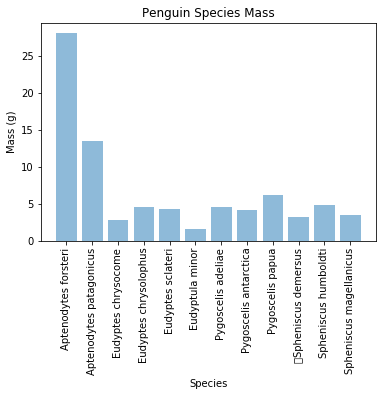

In [182]:
species = ["Aptenodytes forsteri","Aptenodytes patagonicus","Eudyptes chrysocome","Eudyptes chrysolophus","Eudyptes sclateri","Eudyptula minor","Pygoscelis adeliae","Pygoscelis antarctica","Pygoscelis papua","	Spheniscus demersus","Spheniscus humboldti","Spheniscus magellanicus"]
#y_pos = np.arange(len(species))
mass = [28,13.4,2.8,4.5,4.25,1.6,4.6,4.1,6.1,3.2,4.75,3.4]

plt.bar(species, mass, align='center', alpha=0.5)
plt.xticks(species, rotation = "vertical")
plt.ylabel('Mass (g)')
plt.xlabel('Species')
plt.title('Penguin Species Mass')

plt.show()

The smallest penguin species is the Eudyptula minor.  The Eudyptula minor, or the "little penguin", is found on the coastlines of southern Australia and New Zealand, which is interesting because these are warmer climatets.   

---------------------------------
## #9  ##

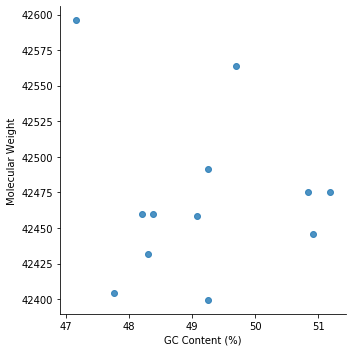

In [193]:
sns.lmplot("GC Content (%)", "Molecular Weight", data = penguins_df, fit_reg = False)

---------------------------------
## #10  ##

In [183]:
##Saving the final dataframe to a csv file.
penguins_df.to_csv("penguins_mass_cytb.csv")

---------------------------------
## #11  ##

In [200]:
pwd()

'C:\\Users\\mjkoh\\BCB546X-Fall2019\\course-files\\BCB546X-Fall2019\\assignments\\Python_Assignment'

In [ ]:
##I have been working on a personal project to produce a 3-dimensional
##plot from a unique DNA sequence. I will try to recreate it here.

In [208]:
##I will use my original test sequence, however I would like to eventually
##and potentially use each unique sequence from the nucleotide data file
##given in this assignment.
print(test)

TGACTCAAACAAAATACATTTTGCCCGCGTTACATATGAATCAAGTTGGAAGTTATGGAG


In [209]:
ADENINE = 135.13
THYMINE = 126.11
CYTOSINE = 111.1
GUANINE = 151.13

In [211]:
iA = 0
iT = 0
iC = 0
iG = 0

aCount = []
tCount = []
cCount = []
gCount = []

for base in range(len(test)):
    if(test[base] == "A" or test[base] == "a"):
        aCount.append((iA/ADENINE))
        iA += 1
    elif ((test[base] == "T") or test[base] == "t"):
        tCount.append((iT/THYMINE))
        iT += 1
    elif ((test[base] == "C") or (test[base] == "c")):
        cCount.append((iC/CYTOSINE))
        iC += 1
    else:
        gCount.append((iG/GUANINE))
        iG += 1

In [212]:
totalCount = np.concatenate([aCount, tCount, cCount, gCount])

In [213]:
aIndex = []
tIndex = []
cIndex = []
gIndex = []

for base in range(len(test)):
    if(test[base] == "A" or test[base] == "a"):
        aIndex.append((base/ADENINE))
    elif(test[base] == "T" or test[base] == "t"):
        tIndex.append((base/THYMINE))
    elif(test[base] == "C" or test[base] == "c"):
        cIndex.append((base/CYTOSINE))
    else:
        gIndex.append((base/GUANINE))

In [214]:
totalIndex = np.concatenate([aIndex,tIndex,cIndex,gIndex])

In [215]:
a = []
t = []
c = []
g = []

iiA = 0
iiT = 0
iiC = 0
iiG = 0

seqLen = 1

for base in range(len(test)):
    if(test[base] == "A" or test[base] == "a"):
        iiA += 1
        a.append((iiA/seqLen)/ADENINE)
        seqLen += 1
    elif(test[base] == "T" or test[base] == "t"):
        iiT += 1
        t.append((iiT/seqLen)/THYMINE)
        seqLen += 1
    elif(test[base] == "C" or test[base] == "c"):
        iiC += 1
        c.append((iiC/seqLen)/CYTOSINE)
        seqLen += 1
    else:
        iiG += 1
        g.append((iiG/seqLen)/GUANINE)
        seqLen += 1

In [216]:
totalProp = np.concatenate([a,t,c,g])

In [217]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

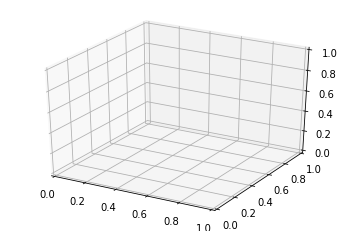

In [218]:
fig = plt.figure()
ax = plt.axes(projection='3d')

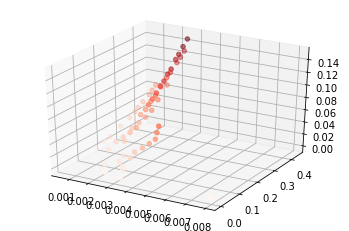

In [219]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
#ax.plot3D(xline, yline, zline, 'gray')


# Data for three-dimensional scattered points
#zdata = np.cos(totalProp)
#zdata = np.cos(totalIndex) #+ 0.1 * np.random.randn(1000) #* len(txt)
#zdata = np.sin(totalCount) #+ 0.1 * np.random.randn(100000) #* len(txt)
zdata = (totalCount)

#xdata = np.cos(totalCount) #+ 0.1 * np.random.randn(100)
#xdata = np.cos(totalProp) #+ 0.1 * np.random.randn(1000)
#xdata = np.cos(totalProp) #+ #0.1 * np.random.randn(100000)
xdata = (totalProp)

#ydata = np.cos(totalIndex) #+ 0.1 * np.random.randn(100)
#ydata = np.cos(totalCount) #+ 0.1 * np.random.randn(1000)
#ydata = np.sin(totalIndex) #+ #0.1 * np.random.randn(100000)
ydata = (totalIndex)


ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

In [221]:
##This plot looks better with a longer sequence, but this is something I 
##have been working on and find interesting. I will continue to improve it
##using what I have learned in this course.